In [35]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = {
    'AfterUpdate' : [0]*50 + [1]*50 , # 0은 업데이트 전, 1은 업데이트 후
    'PageViews':np.random.randint(1,10,100),
    'SessionLength' : np.concatenate([np.random.randint(30,180,50), np.random.randint(40,220,50)]) # 가정: 업데이트 전후 사용자의 세션 길이 차이
}

df = pd.DataFrame(data)

pre_update = df[df['AfterUpdate']==0]
post_update = df[df['AfterUpdate']==1]

model_pre = ols('SessionLength ~ PageViews', data=pre_update).fit()
model_post = ols('SessionLength ~ PageViews', data=post_update).fit()




Chow 검정의 공식
$$F=\dfrac{\left( SSE_{pooled}-\left( SSE_{1}+SSE_{2}\right) \right) /\left( k\right) }{\left( SSE_{1}+SSE_{2}\right) /\left( n_{1}+n_{2}-2k\right) }$$

여기서 SSE_pooled는 두 그룹을 합친 데이터에 대한 회귀 모델의 오차 제곱 합, SSE_1과 SSE_2는 각각의 그룹에 대한 회귀 모델의 오차 제곱 합, k는 회귀 모델의 파라미터 수(여기서는 2), n_1과 n_2는 각 그룹의 관측값 수입니다.

In [73]:
sse1 = np.sum(model_pre.resid ** 2)
sse2 = np.sum(model_post.resid ** 2 )
n1, n2 = len(pre_update), len(post_update)
k = 2

# 합친 데이터셋에 대한 모델
model_pooled = ols('SessionLength ~ PageViews', data=df).fit()
sse_pooled = np.sum(model_pooled.resid ** 2 )

#Chow 검정 통계량 계산
numerator = (sse_pooled - (sse1 + sse2))/(k) 
denominator = (sse1 + sse2) / (n1 + n2 - 2*k)
F = numerator / denominator
#p-value 계산
p_value = 1 - stats.f.cdf(F,k, n1 + n2 - 2*k)

print(f'F-value : {F}')
print(f'p-value : {p_value}')

F-value : 6.913129853890984
p-value : 0.0015671909181168564


<Axes: xlabel='PageViews', ylabel='SessionLength'>

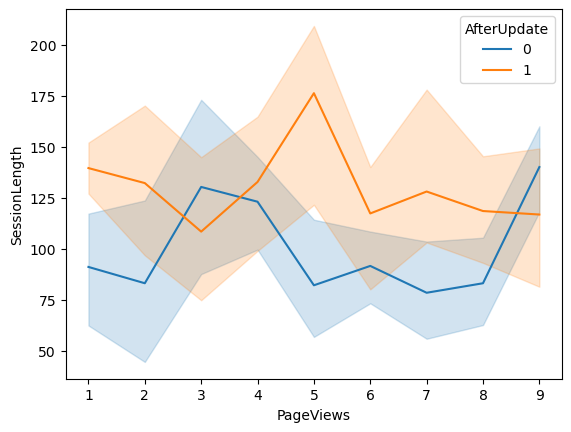

In [74]:
sns.lineplot(data=df,x='PageViews',y='SessionLength',hue='AfterUpdate')